In [3]:
pip install pandas scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

# Load the dataset
file_path = 'Mall_Customers.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
from sklearn.preprocessing import StandardScaler

# Convert 'Gender' to numerical values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Select the features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\91910\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91910\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91910\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91910\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

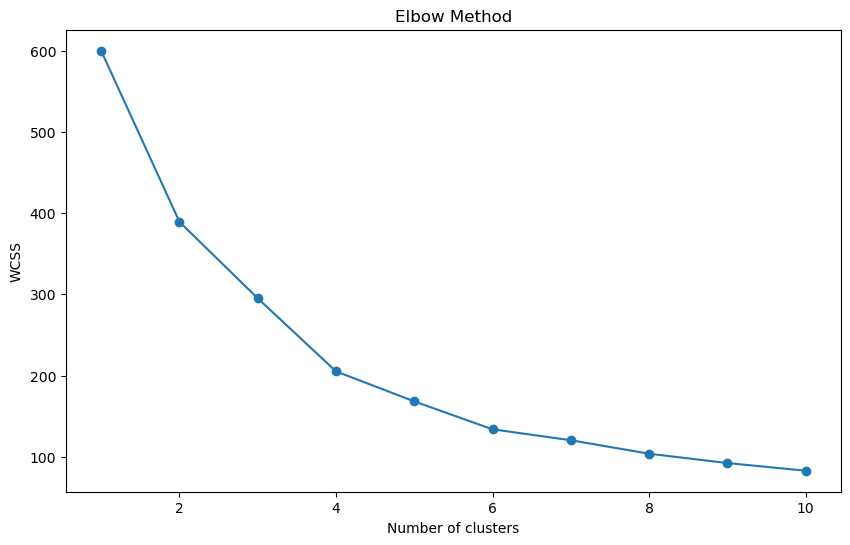

C:\Users\91910\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91910\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit the K-means algorithm with the optimal number of clusters (e.g., 5)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = y_kmeans


In [7]:
# Print the number of customers in each cluster
print(df['Cluster'].value_counts())

# Display the first few rows of the dataframe with cluster labels
print(df.head())


2    54
0    47
1    40
4    39
3    20
Name: Cluster, dtype: int64
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       1   31                  17                      40   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  


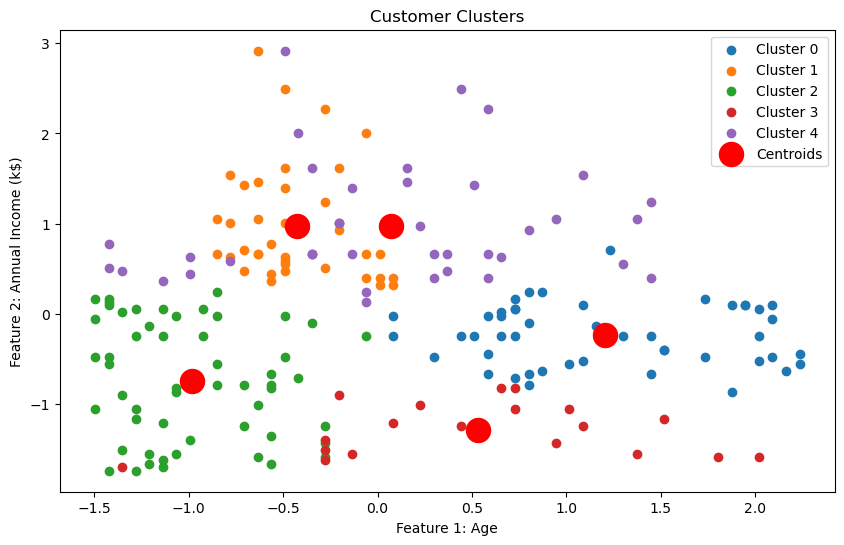

In [8]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
for i in range(optimal_clusters):
    plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer Clusters')
plt.xlabel('Feature 1: Age')
plt.ylabel('Feature 2: Annual Income (k$)')
plt.legend()
plt.show()


C:\Users\91910\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91910\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91910\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91910\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

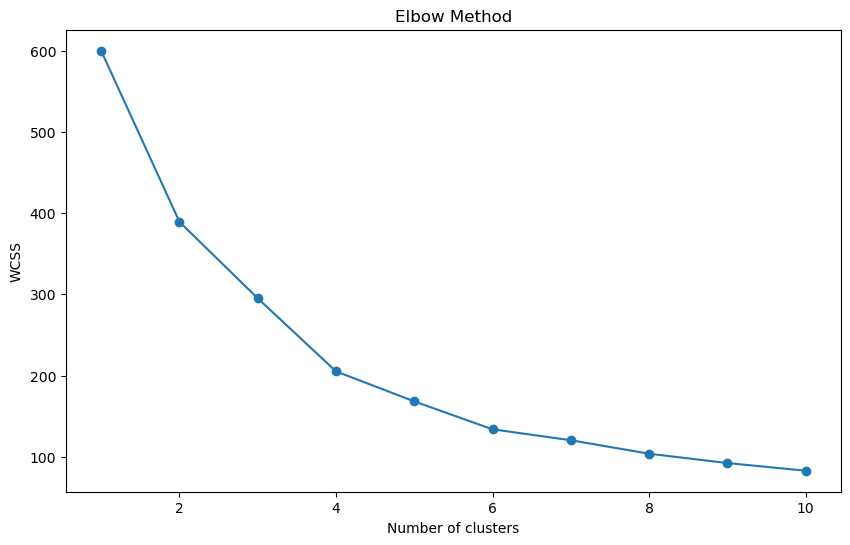

C:\Users\91910\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91910\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2    54
0    47
1    40
4    39
3    20
Name: Cluster, dtype: int64
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       1   31                  17                      40   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  


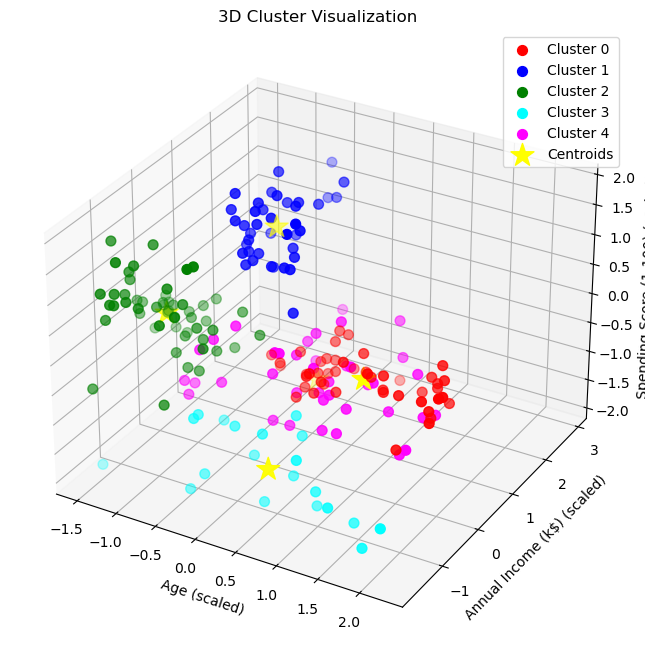

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
file_path = 'Mall_Customers.csv'  # Update this path to your actual file
df = pd.read_csv(file_path)

# Convert 'Gender' to numerical values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Select the features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit the K-means algorithm with the optimal number of clusters (e.g., 5)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = y_kmeans

# Print the number of customers in each cluster
print(df['Cluster'].value_counts())

# Display the first few rows of the dataframe with cluster labels
print(df.head())

# Visualize the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(optimal_clusters):
    ax.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], X_scaled[y_kmeans == i, 2], 
               s=50, c=colors[i], label=f'Cluster {i}')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
           s=300, c='yellow', label='Centroids', marker='*')

ax.set_title('3D Cluster Visualization')
ax.set_xlabel('Age (scaled)')
ax.set_ylabel('Annual Income (k$) (scaled)')
ax.set_zlabel('Spending Score (1-100) (scaled)')
ax.legend()

plt.show()
